array([[array([[6, 7, 7, ..., 5, 5, 5],
               [6, 7, 7, ..., 5, 5, 4],
               [7, 7, 7, ..., 4, 4, 4],
               ...,
               [1, 1, 1, ..., 4, 5, 5],
               [1, 1, 1, ..., 5, 5, 5],
               [1, 1, 1, ..., 5, 5, 6]]), '100'],
       [array([[7, 7, 8, ..., 2, 2, 2],
               [7, 6, 7, ..., 2, 2, 2],
               [6, 6, 6, ..., 2, 2, 2],
               ...,
               [1, 1, 1, ..., 4, 4, 4],
               [1, 1, 1, ..., 4, 4, 4],
               [1, 1, 1, ..., 4, 5, 4]]), '1000'],
       [array([[7, 7, 7, ..., 2, 1, 1],
               [8, 7, 7, ..., 2, 1, 1],
               [8, 7, 7, ..., 2, 1, 1],
               ...,
               [1, 1, 1, ..., 4, 2, 3],
               [1, 1, 1, ..., 4, 2, 3],
               [1, 1, 1, ..., 3, 4, 4]]), '10000'],
       [array([[ 4,  4,  4, ..., 11,  9,  9],
               [ 5,  5,  5, ...,  9,  9,  8],
               [ 5,  5,  5, ...,  8,  8,  8],
               ...,
               [ 8,  8,  9, .

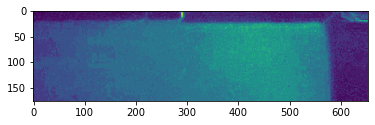

In [1]:
from get_data import get_data_array
import matplotlib.pyplot as plt

data = get_data_array('C')
plt.imshow(data[3][0])

data

TypeError: 'NoneType' object is not subscriptable